In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable as stb

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest

from datetime import datetime, timedelta

from datetime import date
import holidays 

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_pickle('data/bikes_limpio.pkl')
df.head(1)

,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
0,2018-01-01,invierno,2018,enero,sí,lunes,no,niebla,14.1,18.2,80.6,10.7,331,654,985


In [11]:
numericas = df.select_dtypes(np.number)
numericas.head()

,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
0,14.1,18.2,80.6,10.7,331,654,985
1,14.9,17.7,69.6,16.7,131,670,801
2,8.1,9.5,43.7,16.6,120,1229,1349
3,8.2,10.6,59.0,10.7,108,1454,1562
4,9.3,11.5,43.7,12.5,82,1518,1600


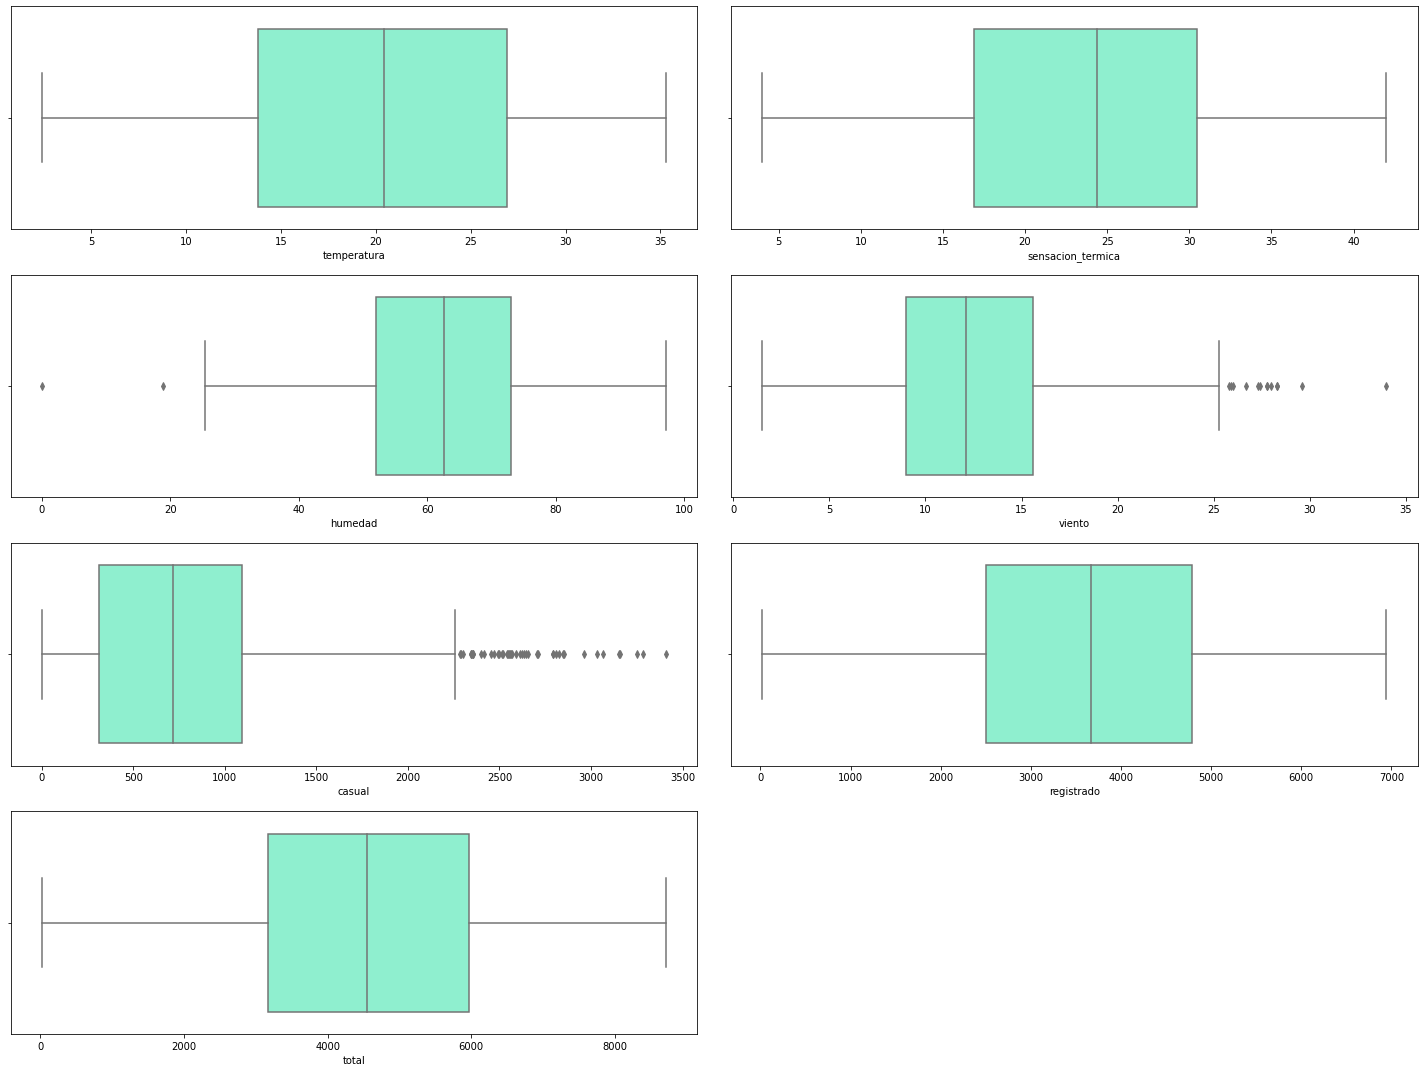

In [17]:
# Procedemos a revisar los outliers de las variables numericas de nuestro df.

fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
        sns.boxplot(x = numericas[columna],
            data = df, ax=axes[indice], 
            color = "aquamarine"); 
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Hemos visualizado que varias de nuestras variables si continen outliers. Son especialmente destacables, 'Viento' y 'Casual'. También hay outliers en humedad y tendremos que revisarlos en profundidad más adelante, ya que washington dc destaca por su clima húmedo.

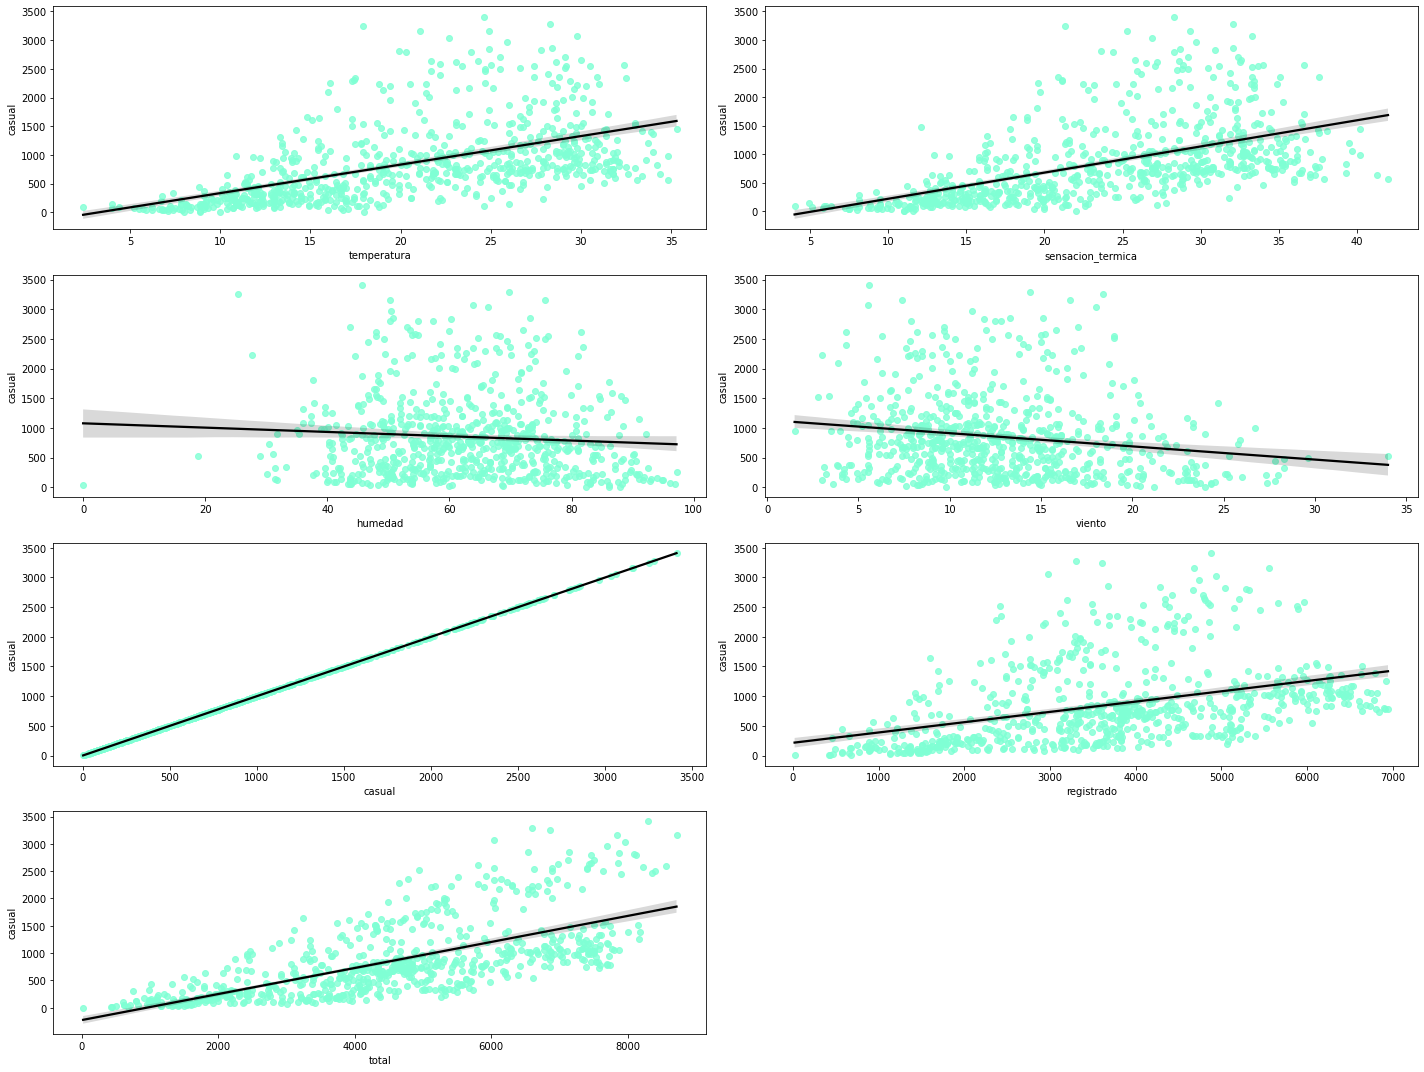

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
        sns.regplot(x = numericas[columna],
                        y = "casual",
                        data = numericas, ax=axes[indice], 
                        color = "aquamarine", line_kws= {"color": "black"}); 
        
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

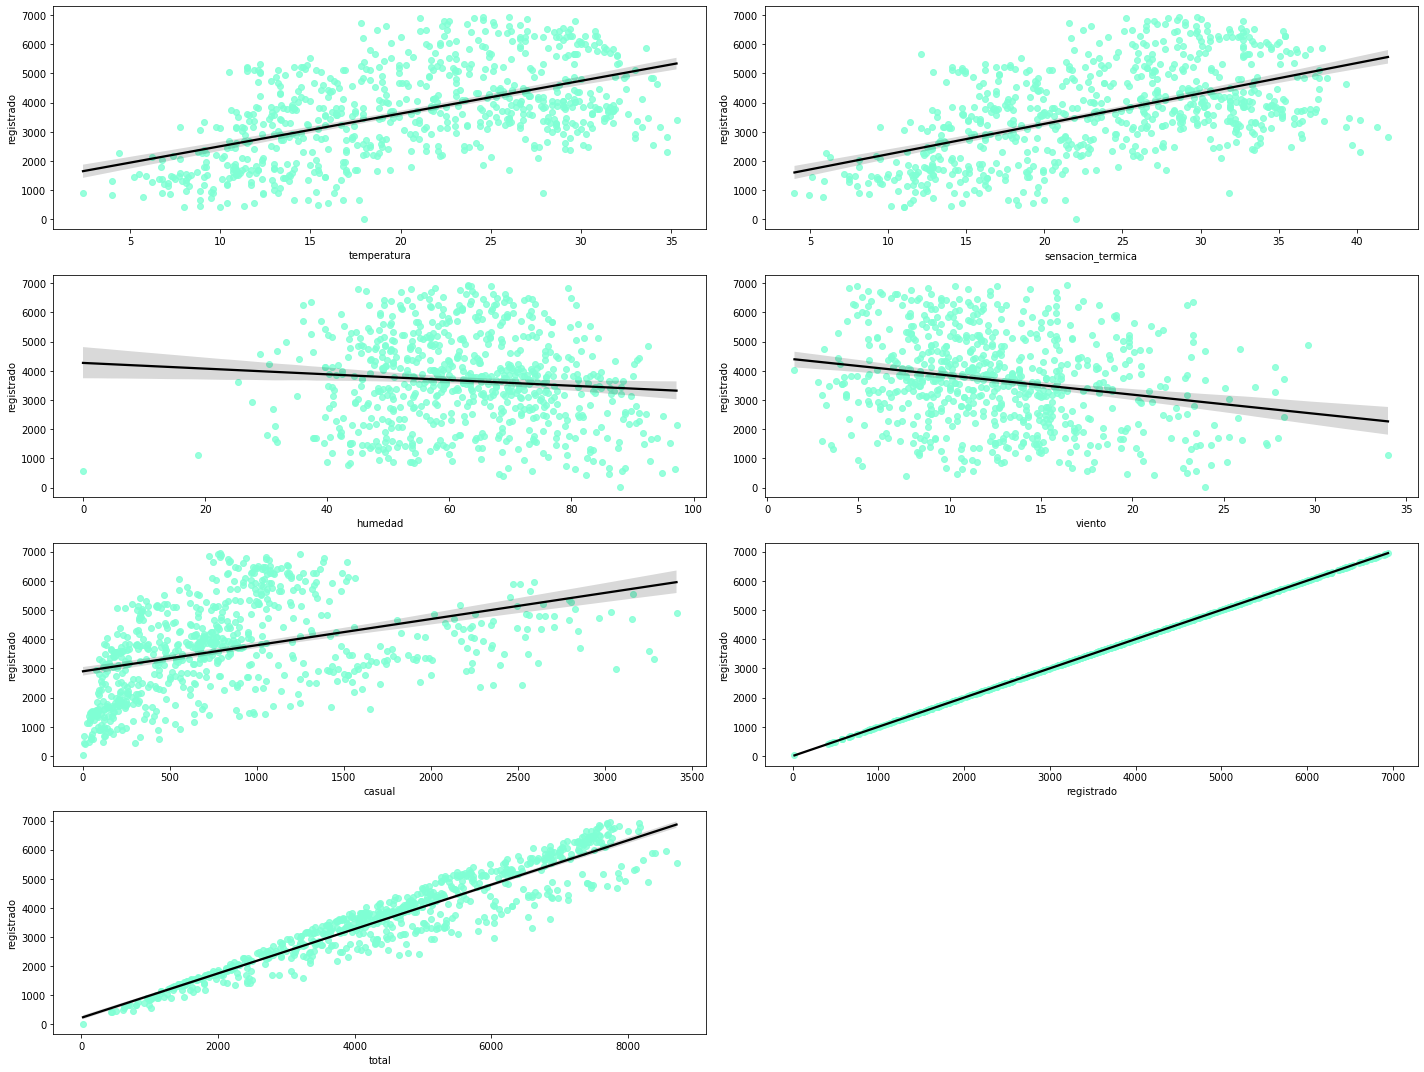

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
        sns.regplot(x = numericas[columna],
                        y = "registrado",
                        data = numericas, ax=axes[indice], 
                        color = "aquamarine", line_kws= {"color": "black"}); 
        
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [34]:
sum(df["registrado"]* 100/ df["total"])/ len(df["registrado"]) # Calculamos el porcentaje medio de usuarios totales con los usuarios registados.

82.42104030397692

Como conclusión, tiene sentido el scatterplot que visualizamos más arriba, ya que comprobamos el peso que tienen las variables de usuarios registrados y los usuarios totales que hacen uso del producto.

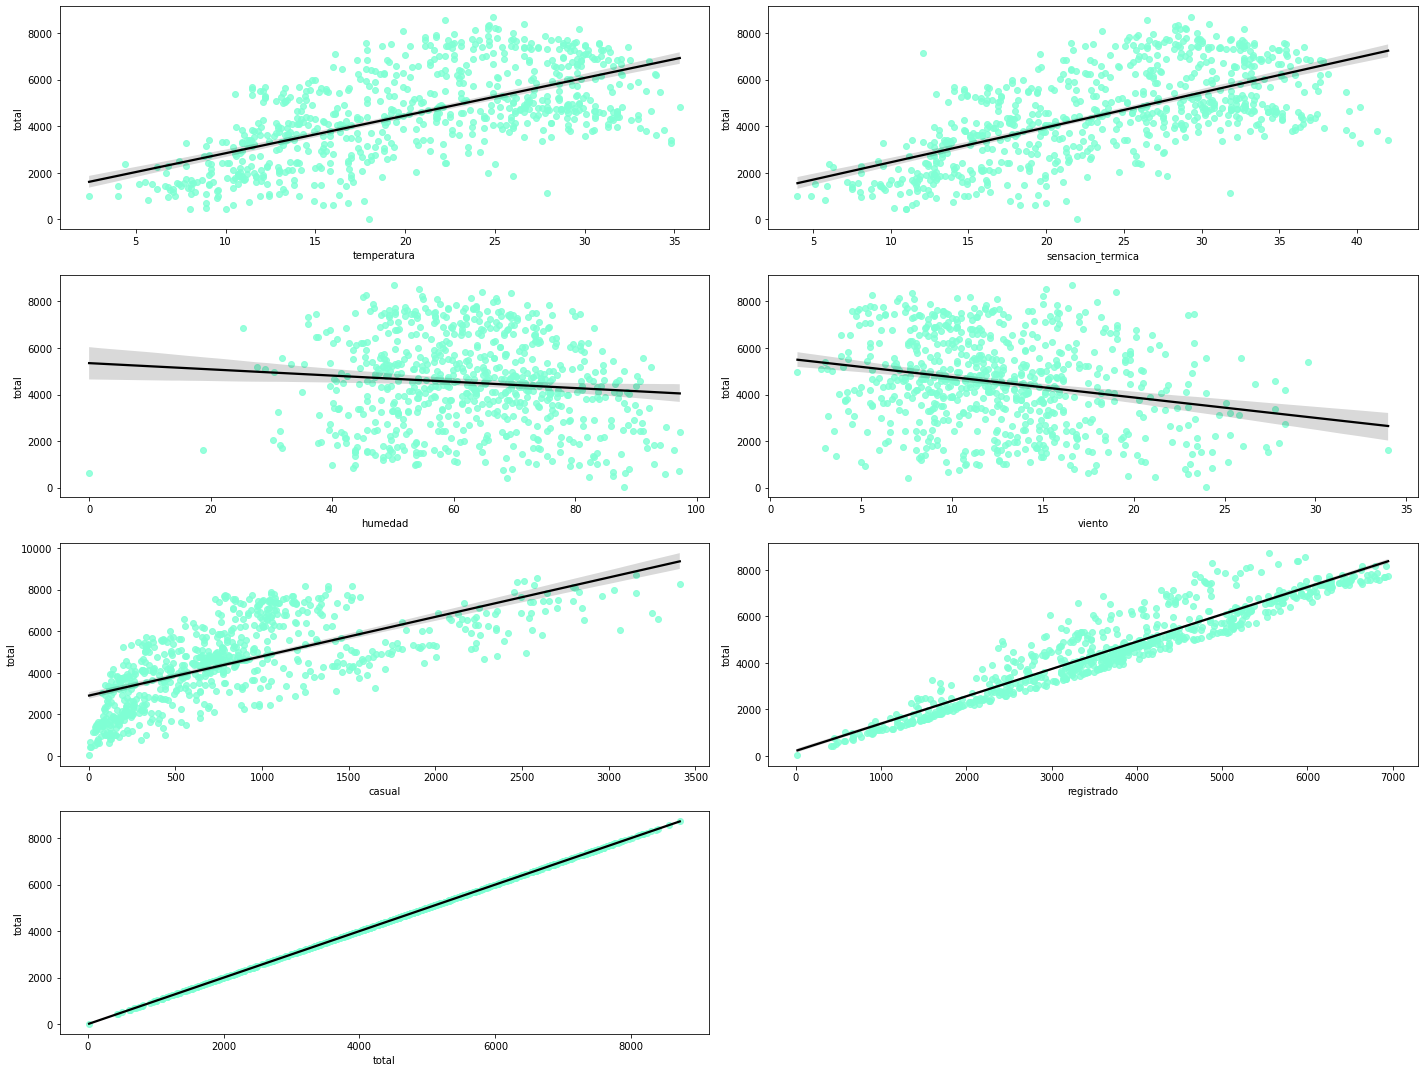

In [35]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
        sns.regplot(x = numericas[columna],
                        y = "total",
                        data = numericas, ax=axes[indice], 
                        color = "aquamarine", line_kws= {"color": "black"}); 
        
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Como conclusión tiene sentido el scatterplot que visualizamos más arriba ya que 

In [20]:
q3 = np.nanpercentile(df["casual"], 75)
print(f"El tercer percentil es {q3}")
df_outliers = df[df["casual"] >= q3]
df_outliers.head()

El tercer percentil es 1096.5


,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
77,2018-03-19,invierno,2018,marzo,no,lunes,sí,cielo despejado,19.4,23.3,37.9,24.7,1424,1693,3117
92,2018-03-04,invierno,2018,marzo,no,domingo,no,cielo despejado,15.5,18.9,48.0,12.2,1651,1598,3249
99,2018-10-04,otoño,2018,octubre,no,jueves,sí,niebla,17.5,21.3,85.8,9.8,1188,1707,2895
106,2018-04-17,primavera,2018,abril,no,martes,sí,cielo despejado,18.7,22.3,48.0,20.3,1558,2186,3744
112,2018-04-23,primavera,2018,abril,no,lunes,sí,niebla,18.9,22.5,88.8,15.5,1462,2574,4036


In [23]:
numericas2 = df_outliers.select_dtypes(np.number)
numericas2.head()

,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
77,19.4,23.3,37.9,24.7,1424,1693,3117
92,15.5,18.9,48.0,12.2,1651,1598,3249
99,17.5,21.3,85.8,9.8,1188,1707,2895
106,18.7,22.3,48.0,20.3,1558,2186,3744
112,18.9,22.5,88.8,15.5,1462,2574,4036


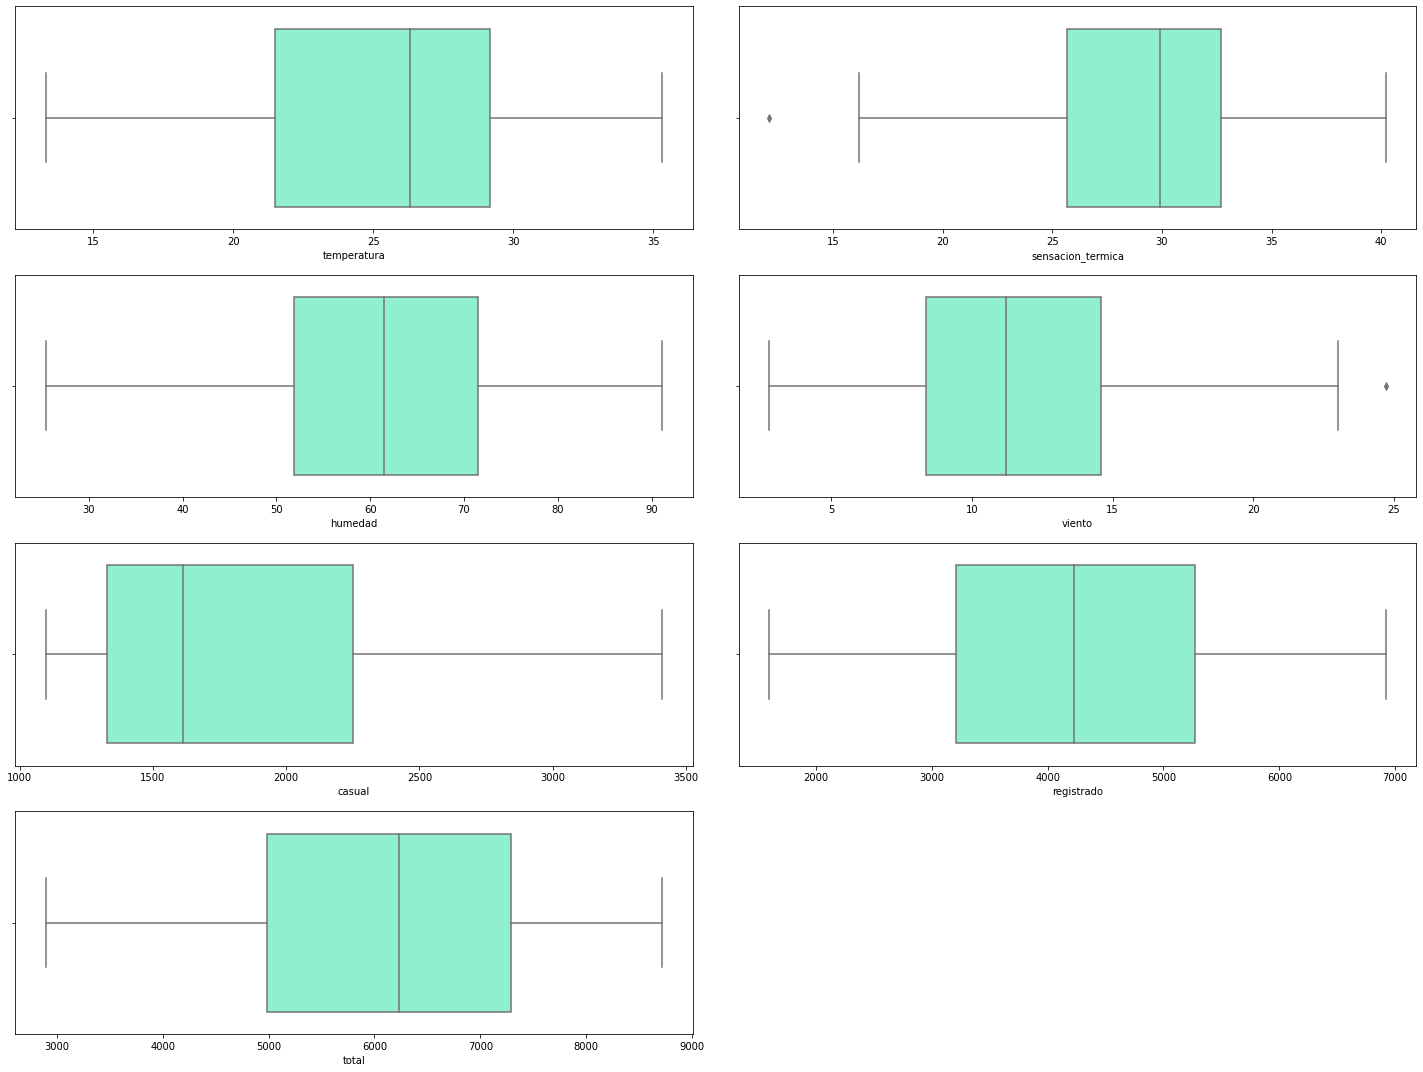

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
        sns.boxplot(x = numericas2[columna],
            data = numericas2, ax=axes[indice], 
            color = "aquamarine"); 
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

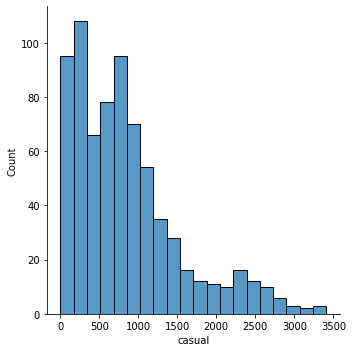

In [25]:
sns.displot(x = "casual", data = df)